In [2]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv("personality_datasert.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# Features and target
X = df.drop(columns=["Personality"])
y = df["Personality"]

# Separate column types
# numeric_features = ["Social_event_attendance", "Drained_after_socializing", "Friends_circle_size"]
# categorical_features = ["Going_outside", "Post_frequency"]

numeric_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Build pipeline
pipe = Pipeline([
    ("preprocess", preprocessor),
    # ("classifier", RandomForestClassifier()),
    ("classifier", LogisticRegression()),
    
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train, X_test, y_train, y_test)

# Fit pipeline
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)
# print(y_test)
# print("Predictions:", y_pred)
print("Score (accuracy):", pipe.score(X_test, y_test))

Score (accuracy): 0.9224137931034483


In [5]:
import joblib

# Save the trained pipeline
joblib.dump(pipe, "personality_model.pkl")


['personality_model.pkl']

In [6]:
# https://personality-checker-fastapi.onrender.com/

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# =======================================
# 1️⃣ Features and Target
# =======================================
X = df.drop(columns=["Personality"])
y = df["Personality"]

numeric_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                    'Friends_circle_size', 'Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']

# =======================================
# 2️⃣ Preprocessing
# =======================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# =======================================
# 3️⃣ Model Pipeline
# =======================================
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# =======================================
# 4️⃣ Train-Test Split
# =======================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================================
# 5️⃣ Model Training
# =======================================
pipe.fit(X_train, y_train)

# =======================================
# 6️⃣ Predictions
# =======================================
y_pred = pipe.predict(X_test)

# =======================================
# 7️⃣ Evaluation Metrics
# =======================================
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# =======================================
# 8️⃣ Display Results
# =======================================
print("✅ Model Evaluation Results")
print("---------------------------------")
print(f"Accuracy Score: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


✅ Model Evaluation Results
---------------------------------
Accuracy Score: 0.92

Confusion Matrix:
[[278  24]
 [ 22 256]]

Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.93      0.92      0.92       302
   Introvert       0.91      0.92      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



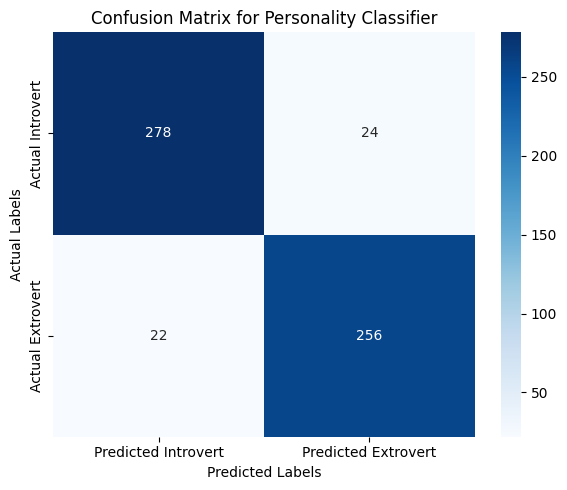

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Introvert', 'Predicted Extrovert'],
            yticklabels=['Actual Introvert', 'Actual Extrovert'])
plt.title('Confusion Matrix for Personality Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()
